In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.svm import SVC

# sombreado de grilla
plt.style.use("fivethirtyeight")

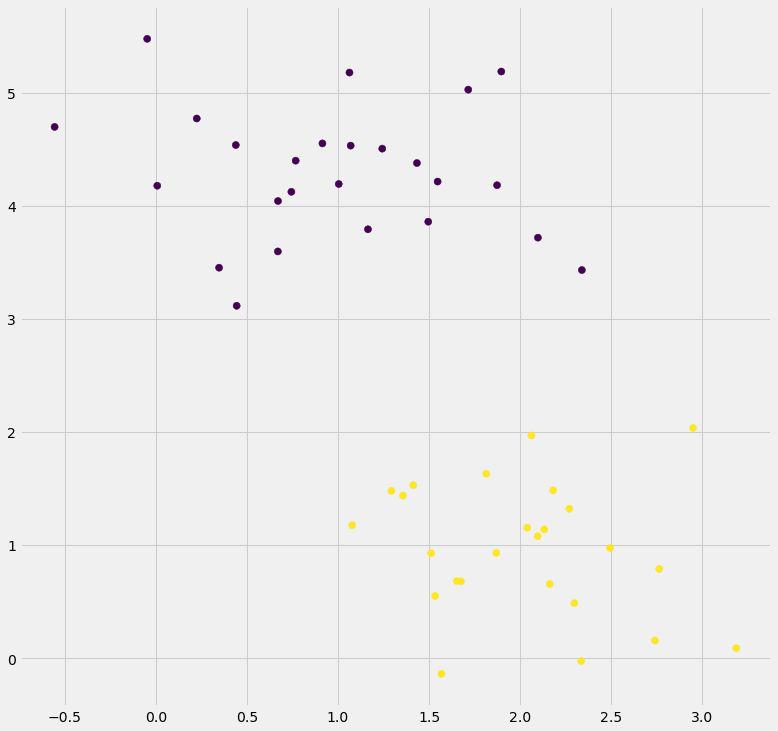

In [3]:
# creando el dataset
from sklearn.datasets.samples_generator import make_blobs
X,y = make_blobs(n_samples = 50 , centers=2 , 
                 random_state= 0 , cluster_std = 0.6)
plt.figure(figsize=(12,12))
plt.scatter(X[:,0] , X[:,1] , c=y , s=50)

(-1, 3.5)

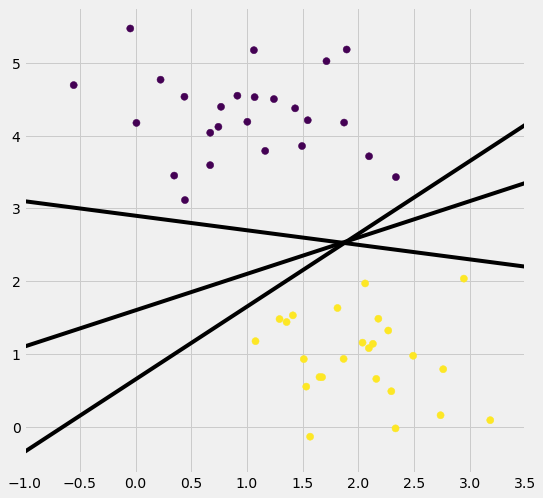

In [4]:
#creamos rectas 
xfit = np.linspace(-1 , 3.5 )
plt.figure(figsize=(8,8))

plt.scatter(X[:,0] , X[:,1] , c=y , s = 50)

for m,b in [(1,0.65) , (0.5,1.6) , (-0.2,2.9)]:
    plt.plot(xfit ,  m * xfit + b , '-k')
    
# limitando el cuadrante del dibujo
plt.xlim(-1 , 3.5)

(-1, 3.5)

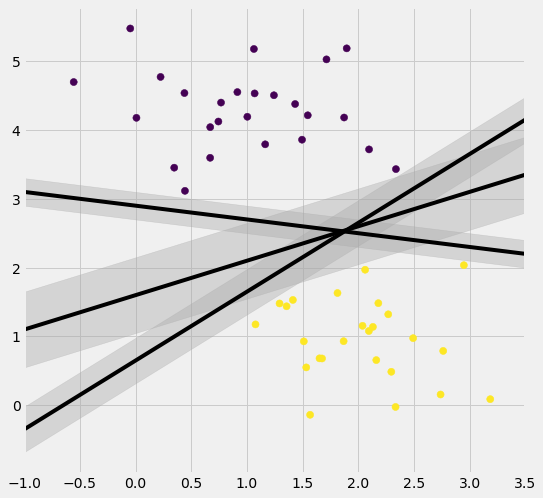

In [5]:
#creamos rectas 
xfit = np.linspace(-1 , 3.5 )
plt.figure(figsize=(8,8))

plt.scatter(X[:,0] , X[:,1] , c=y , s = 50)

for m,b,d in [(1,0.65,0.33) , (0.5,1.6,0.55) , (-0.2 ,2.9,0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit , yfit , "-k")
    plt.fill_between(xfit , yfit - d , yfit + d , 
                    color = "#AAAAAA" , alpha = 0.4)
plt.xlim(-1 , 3.5)

## Modelo SVM

In [19]:
clf = SVC(kernel= "linear")
clf.fit(X , y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
import warnings
warnings.filterwarnings("ignore")

def funcion_svm_vectores_soporte_plot(clf):
    #dibujo de la funcion de decision
    ax = plt.gca()
    x = np.linspace(plt.xlim()[0] , plt.xlim()[1] , 30)
    y = np.linspace(plt.ylim()[0] , plt.ylim()[1] , 30)
    Y , X = np.meshgrid(y ,x)
    P = np.zeros_like(X)
    for i , xi in enumerate(x):
        for j , yj in enumerate(y):
            P[i,j] = clf.decision_function([xi , yj])
    # dibujamos margenes (vectores de soporte)
    ax.contour(X, Y , P , colors = "k" , 
              levels = [-1 , 0 , 1] , alpha = 0.5 , 
              linestyles = ["--" , "-" , "--"]) 

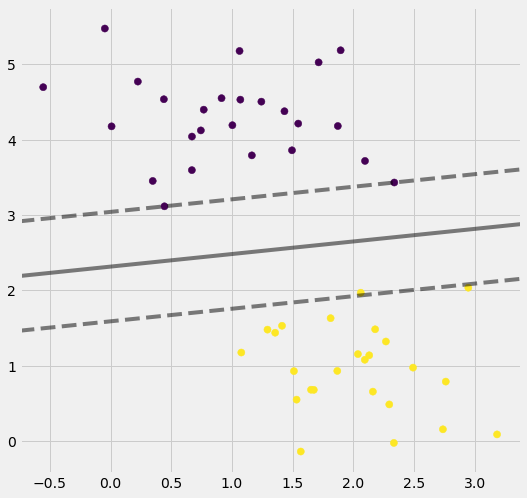

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0] , X[: , 1] , c = y , s = 50)
funcion_svm_vectores_soporte_plot(clf)

#### Clasificando puntos particulares

In [22]:
clf.predict([[2.5 , 5] , [0.5 , 1]])

array([0, 1])

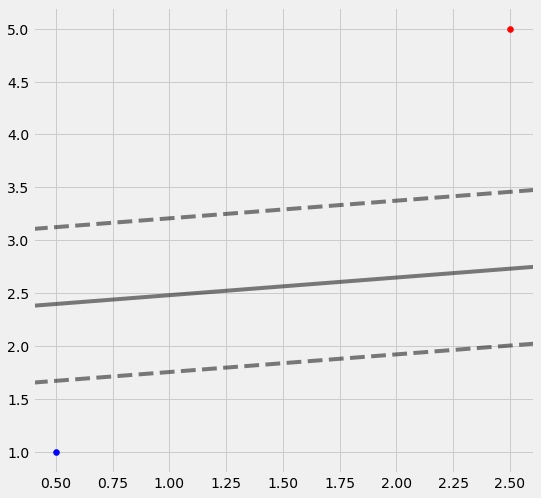

In [27]:

plt.figure(figsize=(8,8))

plt.scatter(2.5,5 , color = "red")
plt.scatter(0.5 , 1, color = "blue")

funcion_svm_vectores_soporte_plot(clf)

### APLICACION EN EL DATASET

In [29]:
# carga de datos
dataset = pd.read_csv("DS_Credito Hipotecario_Sin_Nulls.csv")

In [32]:
data_svm = dataset[["INGRESOS_SOLICITANTE" , 
                   "INGRESOS_COSOLICITANTE" , 
                   "FLAG_CRED_HIPO"]]
data_svm.head()

,INGRESOS_SOLICITANTE,INGRESOS_COSOLICITANTE,FLAG_CRED_HIPO
0,4583,1508.0,N
1,3000,0.0,Y
2,2583,2358.0,Y
3,6000,0.0,Y
4,5417,4196.0,Y


In [33]:
clf_apli = SVC(kernel = 'linear')
clf_apli.fit(data_svm[["INGRESOS_SOLICITANTE" , 
                   "INGRESOS_COSOLICITANTE"]] , 
            data_svm["FLAG_CRED_HIPO"])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

punto [200 , 14000] clasificado como : N
punto [500 , 8000] clasificado como : Y


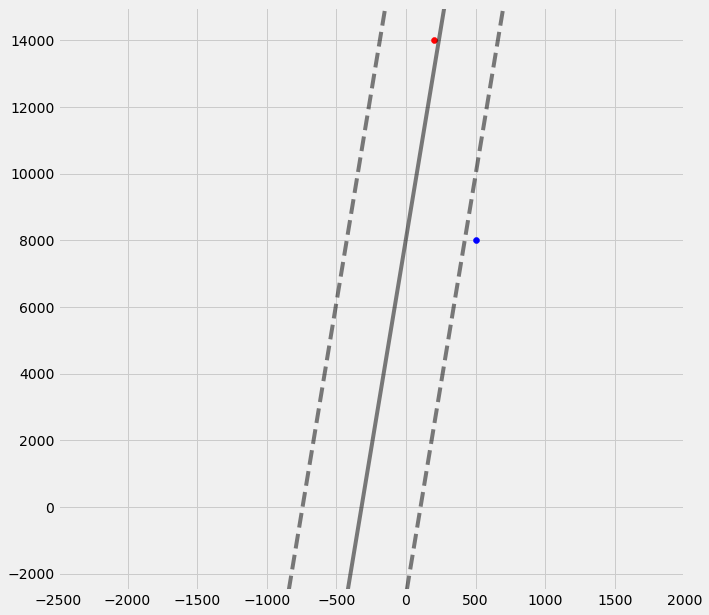

In [37]:
plt.figure(figsize=(10,10))
plt.xlim(-2500 , 2000)
plt.ylim(-2500 , 15000)
plt.scatter(200,14000 , color = "red")
print("punto [200 , 14000] clasificado como : " + 
     str(clf_apli.predict([200,14000])[0]))
plt.scatter(500 , 8000, color = "blue")
print("punto [500 , 8000] clasificado como : " + 
     str(clf_apli.predict([500 , 8000])[0]))
funcion_svm_vectores_soporte_plot(clf_apli)